In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

# CORRELARTION-FEATURE REDUCTION

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt   
import os

############## Control variables for script ##################
# select structure type (perfect or imperfect) and load case type
structure_case = 0
load_case = 2
log_level = "high" # Log level can be high or low
save_csv = True
plot_graph = True

# Path to data and names of folders    
PATH_DATA = '/home/marc/Desktop/CIE-exercise/sim_data/'
PATH_STRUCTURE = ['per_data/', 'imp_data/']
PATH_LOAD_CASE = os.listdir(PATH_DATA+PATH_STRUCTURE[structure_case])

# Print the current case 
print("Data Visualization for \n",
      "Structure type:  " + PATH_STRUCTURE[structure_case] + "\n",
      "Load Case:  " + PATH_LOAD_CASE[load_case] + "\n")


############## Load and clean data ##################
# load data of features
df_dt = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Total Deformation.csv')
df_dx = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Deformation_X_axis.csv')
df_dy = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Deformation_Y_axis.csv')
df_dz = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Deformation_Z_axis.csv')
df_xz = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Shear Stress XY.csv')
df_xy = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Shear Stress XZ.csv')
df_yz = pd.read_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+'/Shear Stress YZ.csv')

df_list = [df_dt, df_dx,df_dy, df_dz, df_xz, df_xy, df_yz]
df_list_def = [df_dt, df_dx, df_dy, df_dz]
df_list_stress = [df_xz, df_xy, df_yz]

# remove not required columns in dataframes
for df in df_list:
    df.drop([df.columns[12], df.columns[0]],axis=1,inplace=True)
    
############## Create dataframe with all features ##################
df_all = pd.DataFrame() # dataframe for correlation calculation, contains all features of all timesteps
timesteps = len(df.axes[1]) # number of timesteps located in the datafile

# loop over all timesteps of this feature
for t in range(1, timesteps):
    df_timestep = pd.DataFrame() #create empty dataframe for feature values on a certain timestep
    for df in df_list:
        df_timestep = pd.concat([df_timestep, df.iloc[:,t]], axis=1) 
        df_all = pd.concat([df_all, df.iloc[:,t]], axis=1)
    # min max normalization
    #df_timestep = (df_timestep-df_timestep.min())/(df_timestep.max()-df_timestep.min())
    # mean normalization
    #df_timestep = (df_timestep-df_timestep.mean())/df_timestep.std()   
    if plot_graph == True:
        # plot graph of data
        plot = df_timestep.plot()

    
############## Removing correlating features ##################
corr_threshold = 0.7 # threshold above which data is seen as redundant
feature_list = df_all.columns # list of all feature labels

# plot correlation matrix of full dataset
plt.matshow(df_all.corr())
plt.colorbar()
plt.savefig(f'/home/marc/all_features_correlation_matrix_load_case{load_case}_structure_case{structure_case}.png')
plt.show()
plt.close()

print("Shape of all features: ", df_all.shape)

# remove all features which correlation is above threshold
for feat_name in feature_list:
    # print("feature:", feat_name)
    if feat_name in df_all.corr().index:
        df_bin = df_all.corr()[df_all.corr()[feat_name].abs() > corr_threshold] # list of features that correlation is above threshold
        corr_feature = df_bin.index # labels of correlating features
        corr_feature = corr_feature.drop([feat_name]) # labels of correlating features without feat_name label
        # print("features to remove:", corr_feature)
        df_all.drop(corr_feature, axis=1, inplace=True)
    else:
        continue

# Plot and save correlation matrix of reduced feature set
plt.matshow(df_all.corr())
plt.colorbar(orientation="vertical")
plt.savefig(f'/home/marc/reduced_features_correlation_matrix_load_case{load_case}_structure_case{structure_case}.png')
plt.show()
plt.close()

# print information about reduced dataset and 
if log_level == "high":
    print("Shape of reduced dataset: ", df_all.shape)
    print("Following features are unique: ", df_all.corr().index)
    print("New dataset has ", df_all.shape[1], "features.")

# save 
if save_csv == True:
    print("Save new dataset to", PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case])
    df_all.to_csv(PATH_DATA+PATH_STRUCTURE[structure_case]+PATH_LOAD_CASE[load_case]+"/reduced_dataset")


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt   
import os

#global i # index for labeling features of each loadcase
i = 0 
structure_case = "both" # structure case either perfect = 0 or imperfect = 1
save_csv = True

def help_function(label):
    global i
    return "case_"+str(i)+"_"+label

############# CORRELATION BETWEEN DIFFERENT LOAD CASES ####################
num_imp_data = 15
num_per_data = 4

# Path to data and names of folders    
PATH_DATA = '/home/marc/Desktop/CIE-exercise/sim_data/'
PATH_LOAD_CASE_PER = os.listdir(PATH_DATA+'per_data/')
PATH_LOAD_CASE_IMP = os.listdir(PATH_DATA+'imp_data/')
      
df_all = pd.DataFrame()

# Concatinate all features from the reduced feature set of the perfect structure cases
if structure_case == "perfect":
    for per_case in PATH_LOAD_CASE_PER:
        df = pd.read_csv(PATH_DATA+'per_data/'+per_case+'/reduced_dataset')
        df.rename(help_function, axis="columns", inplace=True) # rename axis labels to make them unique for different loadcases
        #global i
        i = i+1
        df_all = pd.concat([df_all, df], axis=1)
        
elif structure_case == "imperfect":
    # Concatinate all features from the reduced feature set of the imperfect structure cases
    for imp_case in PATH_LOAD_CASE_IMP:
        df = pd.read_csv(PATH_DATA+'imp_data/'+imp_case+'/reduced_dataset')
        df.rename(help_function, axis="columns", inplace=True)# rename axis labels to make them unique for different loadcases
        #global i
        i = i+1
        df_all = pd.concat([df_all, df], axis=1)
        
elif structure_case == "both":
    for per_case in PATH_LOAD_CASE_PER:
        df = pd.read_csv(PATH_DATA+'per_data/'+per_case+'/reduced_dataset')
        df.rename(help_function, axis="columns", inplace=True) # rename axis labels to make them unique for different loadcases
        #global i
        i = i+1
        df_all = pd.concat([df_all, df], axis=1)
        
    for imp_case in PATH_LOAD_CASE_IMP:
        df = pd.read_csv(PATH_DATA+'imp_data/'+imp_case+'/reduced_dataset')
        df.rename(help_function, axis="columns", inplace=True)# rename axis labels to make them unique for different loadcases
        #global i
        i = i+1
        df_all = pd.concat([df_all, df], axis=1)
        
else:
    print("Error, structure case not konwn. Has to be perfect or imperfect.")
 

print("Shape of concatinated reduced feature set: ", df_all.shape)
plt.matshow(df_all.corr())
plt.colorbar()
plt.savefig(f"/home/marc/correlation_matrix_reduced_feature_set_structure_case_{structure_case}.png")
plt.show()
plt.close()

corr_threshold = 0.7 # threshold above which data is seen as redundant
feature_list = df_all.columns # list of all feature labels

print("Shape of all features of all load cases: ", df_all.shape)
# remove all features which correlation is above threshold
for feat_name in feature_list:
    print("feature:", feat_name)
    if feat_name in df_all.corr().index:
        df_bin = df_all.corr()[df_all.corr()[feat_name].abs() > corr_threshold] # list of features that correlation is above threshold
        corr_feature = df_bin.index # labels of correlating features
        corr_feature = corr_feature.drop([feat_name]) # labels of correlating features without feat_name label
        # print("features to remove:", corr_feature)
        df_all.drop(corr_feature, axis=1, inplace=True)
    else:
        continue

print("Shape of reduced feature set: ", df_all.shape)
print("Following features are unique: ", df_all.corr().index)
print("New dataset has ", df_all.shape[1], "features.")
plt.matshow(df_all.corr())
plt.colorbar()
plt.savefig(f"/home/marc/correlation_matrix_final_reduced_feature_set_structure_case_{structure_case}.png")
plt.show()
plt.close()

if save_csv == True:
    df_all.to_csv(f"/home/marc/reduced_features_set_structure_case_{structure_case}.csv")

# LSTM BINARY CLASS CLASSIFIER

In [57]:
PATH_DATA = '/kaggle/input/praveen/CIE-exercise-reduced/sim_data'
P_PATH_STRUCTURE = '/per_data/'
IMP_PATH_STRUCTURE = '/imp_data/'
PATH_LOAD_CASE_P = os.listdir(PATH_DATA+P_PATH_STRUCTURE)
PATH_LOAD_CASE_IP = os.listdir(PATH_DATA+IMP_PATH_STRUCTURE)
#reading perfect data for all four cases
#df_<..>_{1,2,3,4}.1-extreme track 2000 2-extreme track 5000 3-opposite direction 2000 4-middle track 2000 [loading cases]

#loadcase1
df_perfred_1_tf = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Total Deformation.csv')
df_perfred_1_sxy = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Shear Stress XY.csv')
df_perfred_1_sxz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Shear Stress XZ.csv')
df_perfred_1_syz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Shear Stress YZ.csv')


df_perfred_1_tf.drop([df_perfred_1_tf.columns[12]],axis=1,inplace=True)
df_perfred_1_sxy.drop([df_perfred_1_sxy.columns[12]],axis=1,inplace=True)
df_perfred_1_sxz.drop([df_perfred_1_sxz.columns[12]],axis=1,inplace=True)
df_perfred_1_syz.drop([df_perfred_1_syz.columns[12]],axis=1,inplace=True)

df_perfred_1 = pd.merge(df_perfred_1_tf,df_perfred_1_sxy, on='Node Number')
df_perfred_1 = pd.merge(df_perfred_1,df_perfred_1_sxz, on='Node Number')
df_perfred_1 = pd.merge(df_perfred_1,df_perfred_1_syz, on='Node Number')

#loadcase2
df_perfred_2_tf = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[0]+'/Total Deformation.csv')
df_perfred_2_sxy = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[0]+'/Shear Stress XY.csv')
df_perfred_2_sxz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[0]+'/Shear Stress XZ.csv')
df_perfred_2_syz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[0]+'/Shear Stress YZ.csv')


df_perfred_2_tf.drop([df_perfred_2_tf.columns[12]],axis=1,inplace=True)
df_perfred_2_sxy.drop([df_perfred_2_sxy.columns[12]],axis=1,inplace=True)
df_perfred_2_sxz.drop([df_perfred_2_sxz.columns[12]],axis=1,inplace=True)
df_perfred_2_syz.drop([df_perfred_2_syz.columns[12]],axis=1,inplace=True)

df_perfred_2 = pd.merge(df_perfred_2_tf,df_perfred_2_sxy, on='Node Number')
df_perfred_2 = pd.merge(df_perfred_2,df_perfred_2_sxz, on='Node Number')
df_perfred_2 = pd.merge(df_perfred_2,df_perfred_2_syz, on='Node Number')

#loadcase3
df_perfred_3_tf = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[3]+'/Total Deformation.csv')
df_perfred_3_sxy = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[3]+'/Shear Stress XY.csv')
df_perfred_3_sxz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[3]+'/Shear Stress XZ.csv')
df_perfred_3_syz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[3]+'/Shear Stress YZ.csv')


df_perfred_3_tf.drop([df_perfred_3_tf.columns[12]],axis=1,inplace=True)
df_perfred_3_sxy.drop([df_perfred_3_sxy.columns[12]],axis=1,inplace=True)
df_perfred_3_sxz.drop([df_perfred_3_sxz.columns[12]],axis=1,inplace=True)
df_perfred_3_syz.drop([df_perfred_3_syz.columns[12]],axis=1,inplace=True)

df_perfred_3 = pd.merge(df_perfred_3_tf,df_perfred_3_sxy, on='Node Number')
df_perfred_3 = pd.merge(df_perfred_3,df_perfred_3_sxz, on='Node Number')
df_perfred_3 = pd.merge(df_perfred_3,df_perfred_3_syz, on='Node Number')

#loadcase4
df_perfred_4_tf = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[2]+'/Total Deformation.csv')
df_perfred_4_sxy = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[2]+'/Shear Stress XY.csv')
df_perfred_4_sxz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[2]+'/Shear Stress XZ.csv')
df_perfred_4_syz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[2]+'/Shear Stress YZ.csv')


df_perfred_4_tf.drop([df_perfred_4_tf.columns[12]],axis=1,inplace=True)
df_perfred_4_sxy.drop([df_perfred_4_sxy.columns[12]],axis=1,inplace=True)
df_perfred_4_sxz.drop([df_perfred_4_sxz.columns[12]],axis=1,inplace=True)
df_perfred_4_syz.drop([df_perfred_4_syz.columns[12]],axis=1,inplace=True)

df_perfred_4 = pd.merge(df_perfred_4_tf,df_perfred_4_sxy, on='Node Number')
df_perfred_4 = pd.merge(df_perfred_4,df_perfred_4_sxz, on='Node Number')
df_perfred_4 = pd.merge(df_perfred_4,df_perfred_4_syz, on='Node Number')




df_perfred = pd.concat([df_perfred_1,df_perfred_2,df_perfred_3,df_perfred_4])

df_perfred['Label'] = 0 #label for perfect class





In [58]:
df_perfred.head(2)
df_perfred.shape

(116904, 46)

In [59]:
#class 1 defect file
#df_imperfred_c1_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/reduced_dataset.csv'


#Load case 1
df_imperfred_c1_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Total Deformation.csv')
df_imperfred_c1_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Shear Stress XY.csv')
df_imperfred_c1_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Shear Stress XZ.csv')
df_imperfred_c1_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Shear Stress YZ.csv')

df_imperfred_c1_1_tf.drop([df_imperfred_c1_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c1_1_sxy.drop([df_imperfred_c1_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c1_1_sxz.drop([df_imperfred_c1_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c1_1_syz.drop([df_imperfred_c1_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c1_1 = pd.merge(df_imperfred_c1_1_tf,df_imperfred_c1_1_sxy, on='Node Number')
df_imperfred_c1_1 = pd.merge(df_imperfred_c1_1,df_imperfred_c1_1_sxz, on='Node Number')
df_imperfred_c1_1 = pd.merge(df_imperfred_c1_1,df_imperfred_c1_1_syz, on='Node Number')

#Load case 2
df_imperfred_c1_2_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[1]+'/Total Deformation.csv')
df_imperfred_c1_2_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[1]+'/Shear Stress XY.csv')
df_imperfred_c1_2_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[1]+'/Shear Stress XZ.csv')
df_imperfred_c1_2_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[1]+'/Shear Stress YZ.csv')

df_imperfred_c1_2_tf.drop([df_imperfred_c1_2_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c1_2_sxy.drop([df_imperfred_c1_2_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c1_2_sxz.drop([df_imperfred_c1_2_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c1_2_syz.drop([df_imperfred_c1_2_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c1_2 = pd.merge(df_imperfred_c1_2_tf,df_imperfred_c1_2_sxy, on='Node Number')
df_imperfred_c1_2 = pd.merge(df_imperfred_c1_2,df_imperfred_c1_2_sxz, on='Node Number')
df_imperfred_c1_2 = pd.merge(df_imperfred_c1_2,df_imperfred_c1_2_syz, on='Node Number')

#Load case 3
df_imperfred_c1_3_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[2]+'/Total Deformation.csv')
df_imperfred_c1_3_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[2]+'/Shear Stress XY.csv')
df_imperfred_c1_3_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[2]+'/Shear Stress XZ.csv')
df_imperfred_c1_3_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[2]+'/Shear Stress YZ.csv')

df_imperfred_c1_3_tf.drop([df_imperfred_c1_3_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c1_3_sxy.drop([df_imperfred_c1_3_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c1_3_sxz.drop([df_imperfred_c1_3_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c1_3_syz.drop([df_imperfred_c1_3_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c1_3 = pd.merge(df_imperfred_c1_3_tf,df_imperfred_c1_3_sxy, on='Node Number')
df_imperfred_c1_3 = pd.merge(df_imperfred_c1_3,df_imperfred_c1_3_sxz, on='Node Number')
df_imperfred_c1_3 = pd.merge(df_imperfred_c1_3,df_imperfred_c1_3_syz, on='Node Number')









#df_imperfred_c1_1['Label'] = 1


#print(PATH_LOAD_CASE_IP[0])


In [60]:
df_imperfred_c1_2.head(2)

,Node Number,Total Deformation (mm) for Total Deformation,Total Deformation (mm) for Total Deformation 0.1,Total Deformation (mm) for Total Deformation 0.5,Total Deformation (mm) for Total Deformation 0.9,Total Deformation (mm) for Total Deformation 1.1,Total Deformation (mm) for Total Deformation 1.5,Total Deformation (mm) for Total Deformation 1.9,Total Deformation (mm) for Total Deformation 2.1,Total Deformation (mm) for Total Deformation 2.5,...,Shear Stress (MPa) for Shear Stress YZ 0.1,Shear Stress (MPa) for Shear Stress YZ 0.5,Shear Stress (MPa) for Shear Stress YZ 0.9,Shear Stress (MPa) for Shear Stress YZ 1.1,Shear Stress (MPa) for Shear Stress YZ 1.5,Shear Stress (MPa) for Shear Stress YZ 1.9,Shear Stress (MPa) for Shear Stress YZ 2.1,Shear Stress (MPa) for Shear Stress YZ 2.5,Shear Stress (MPa) for Shear Stress YZ 2.9,Shear Stress (MPa) for Shear Stress YZ 3
0,1,0.000058,0.002062,0.004186,0.002063,0.001588,0.002740,0.001587,0.012994,0.027408,...,0.51998,1.04850,0.51984,0.042639,0.068198,0.042553,2.43570,4.63320,2.43700,0.004532
1,2,0.000059,0.002232,0.004515,0.002233,0.001623,0.002839,0.001621,0.020680,0.041316,...,0.22198,0.45768,0.22190,0.073544,0.136990,0.073466,0.37422,0.70136,0.37524,0.003588


In [61]:
#class 2 defect file
#df_imperfred_c2_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/reduced_dataset.csv')


#LOAD CASE 1
df_imperfred_c2_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Total Deformation.csv')
df_imperfred_c2_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Shear Stress XY.csv')
df_imperfred_c2_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Shear Stress XZ.csv')
df_imperfred_c2_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Shear Stress YZ.csv')

df_imperfred_c2_1_tf.drop([df_imperfred_c2_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c2_1_sxy.drop([df_imperfred_c2_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c2_1_sxz.drop([df_imperfred_c2_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c2_1_syz.drop([df_imperfred_c2_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c2_1 = pd.merge(df_imperfred_c2_1_tf,df_imperfred_c2_1_sxy, on='Node Number')
df_imperfred_c2_1 = pd.merge(df_imperfred_c2_1,df_imperfred_c2_1_sxz, on='Node Number')
df_imperfred_c2_1 = pd.merge(df_imperfred_c2_1,df_imperfred_c2_1_syz, on='Node Number')

#LOAD CASE 2
df_imperfred_c2_2_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[4]+'/Total Deformation.csv')
df_imperfred_c2_2_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[4]+'/Shear Stress XY.csv')
df_imperfred_c2_2_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[4]+'/Shear Stress XZ.csv')
df_imperfred_c2_2_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[4]+'/Shear Stress YZ.csv')

df_imperfred_c2_2_tf.drop([df_imperfred_c2_2_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c2_2_sxy.drop([df_imperfred_c2_2_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c2_2_sxz.drop([df_imperfred_c2_2_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c2_2_syz.drop([df_imperfred_c2_2_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c2_2 = pd.merge(df_imperfred_c2_2_tf,df_imperfred_c2_2_sxy, on='Node Number')
df_imperfred_c2_2 = pd.merge(df_imperfred_c2_2,df_imperfred_c2_2_sxz, on='Node Number')
df_imperfred_c2_2 = pd.merge(df_imperfred_c2_2,df_imperfred_c2_2_syz, on='Node Number')

#LOAD CASE 3
df_imperfred_c2_3_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[5]+'/Total Deformation.csv')
df_imperfred_c2_3_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[5]+'/Shear Stress XY.csv')
df_imperfred_c2_3_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[5]+'/Shear Stress XZ.csv')
df_imperfred_c2_3_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[5]+'/Shear Stress YZ.csv')

df_imperfred_c2_3_tf.drop([df_imperfred_c2_3_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c2_3_sxy.drop([df_imperfred_c2_3_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c2_3_sxz.drop([df_imperfred_c2_3_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c2_3_syz.drop([df_imperfred_c2_3_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c2_3 = pd.merge(df_imperfred_c2_3_tf,df_imperfred_c2_3_sxy, on='Node Number')
df_imperfred_c2_3 = pd.merge(df_imperfred_c2_3,df_imperfred_c2_3_sxz, on='Node Number')
df_imperfred_c2_3 = pd.merge(df_imperfred_c2_3,df_imperfred_c2_3_syz, on='Node Number')


#df_imperfred_c2_1['Label'] = 1



In [62]:
df_imperfred_c2_3.head(2)

,Node Number,Total Deformation (mm) for Total Deformation,Total Deformation (mm) for Total Deformation 0.1,Total Deformation (mm) for Total Deformation 0.5,Total Deformation (mm) for Total Deformation 0.9,Total Deformation (mm) for Total Deformation 1.1,Total Deformation (mm) for Total Deformation 1.5,Total Deformation (mm) for Total Deformation 1.9,Total Deformation (mm) for Total Deformation 2.1,Total Deformation (mm) for Total Deformation 2.5,...,Shear Stress (MPa) for Shear Stress YZ 0.1,Shear Stress (MPa) for Shear Stress YZ 0.5,Shear Stress (MPa) for Shear Stress YZ 0.9,Shear Stress (MPa) for Shear Stress YZ 1.1,Shear Stress (MPa) for Shear Stress YZ 1.5,Shear Stress (MPa) for Shear Stress YZ 1.9,Shear Stress (MPa) for Shear Stress YZ 2.1,Shear Stress (MPa) for Shear Stress YZ 2.5,Shear Stress (MPa) for Shear Stress YZ 2.9,Shear Stress (MPa) for Shear Stress YZ 3
0,1,0.000054,0.000875,0.001837,0.000875,0.000681,0.001303,0.000681,0.005641,0.010966,...,0.189690,0.37608,0.189740,0.008161,0.007540,0.007960,1.03340,2.03530,1.03370,0.004234
1,2,0.000053,0.000936,0.001958,0.000936,0.000691,0.001334,0.000691,0.008736,0.017174,...,0.078474,0.15303,0.078471,0.026016,0.046773,0.025928,0.17139,0.33079,0.17165,0.003473


In [63]:
#class 3 defect file
#df_imperfred_c3_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/reduced_dataset.csv')


#LOAD CASE 1
df_imperfred_c3_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Total Deformation.csv')
df_imperfred_c3_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Shear Stress XY.csv')
df_imperfred_c3_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Shear Stress XZ.csv')
df_imperfred_c3_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Shear Stress YZ.csv')

df_imperfred_c3_1_tf.drop([df_imperfred_c3_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c3_1_sxy.drop([df_imperfred_c3_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c3_1_sxz.drop([df_imperfred_c3_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c3_1_syz.drop([df_imperfred_c3_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c3_1 = pd.merge(df_imperfred_c3_1_tf,df_imperfred_c3_1_sxy, on='Node Number')
df_imperfred_c3_1 = pd.merge(df_imperfred_c3_1,df_imperfred_c3_1_sxz, on='Node Number')
df_imperfred_c3_1 = pd.merge(df_imperfred_c3_1,df_imperfred_c3_1_syz, on='Node Number')

#LOAD CASE 2
df_imperfred_c3_2_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[7]+'/Total Deformation.csv')
df_imperfred_c3_2_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[7]+'/Shear Stress XY.csv')
df_imperfred_c3_2_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[7]+'/Shear Stress XZ.csv')
df_imperfred_c3_2_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[7]+'/Shear Stress YZ.csv')

df_imperfred_c3_2_tf.drop([df_imperfred_c3_2_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c3_2_sxy.drop([df_imperfred_c3_2_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c3_2_sxz.drop([df_imperfred_c3_2_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c3_2_syz.drop([df_imperfred_c3_2_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c3_2 = pd.merge(df_imperfred_c3_2_tf,df_imperfred_c3_2_sxy, on='Node Number')
df_imperfred_c3_2 = pd.merge(df_imperfred_c3_2,df_imperfred_c3_2_sxz, on='Node Number')
df_imperfred_c3_2 = pd.merge(df_imperfred_c3_2,df_imperfred_c3_2_syz, on='Node Number')

#LOAD CASE 3
df_imperfred_c3_3_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[8]+'/Total Deformation.csv')
df_imperfred_c3_3_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[8]+'/Shear Stress XY.csv')
df_imperfred_c3_3_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[8]+'/Shear Stress XZ.csv')
df_imperfred_c3_3_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[8]+'/Shear Stress YZ.csv')

df_imperfred_c3_3_tf.drop([df_imperfred_c3_3_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c3_3_sxy.drop([df_imperfred_c3_3_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c3_3_sxz.drop([df_imperfred_c3_3_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c3_3_syz.drop([df_imperfred_c3_3_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c3_3 = pd.merge(df_imperfred_c3_3_tf,df_imperfred_c3_3_sxy, on='Node Number')
df_imperfred_c3_3 = pd.merge(df_imperfred_c3_3,df_imperfred_c3_3_sxz, on='Node Number')
df_imperfred_c3_3 = pd.merge(df_imperfred_c3_3,df_imperfred_c3_3_syz, on='Node Number')


#df_imperfred_c3_1['Label'] = 1

In [47]:
df_imperfred_c3_3.head(2)

,Node Number,Total Deformation (mm) for Total Deformation,Total Deformation (mm) for Total Deformation 0.1,Total Deformation (mm) for Total Deformation 0.5,Total Deformation (mm) for Total Deformation 0.9,Total Deformation (mm) for Total Deformation 1.1,Total Deformation (mm) for Total Deformation 1.5,Total Deformation (mm) for Total Deformation 1.9,Total Deformation (mm) for Total Deformation 2.1,Total Deformation (mm) for Total Deformation 2.5,...,Shear Stress (MPa) for Shear Stress YZ 0.1,Shear Stress (MPa) for Shear Stress YZ 0.5,Shear Stress (MPa) for Shear Stress YZ 0.9,Shear Stress (MPa) for Shear Stress YZ 1.1,Shear Stress (MPa) for Shear Stress YZ 1.5,Shear Stress (MPa) for Shear Stress YZ 1.9,Shear Stress (MPa) for Shear Stress YZ 2.1,Shear Stress (MPa) for Shear Stress YZ 2.5,Shear Stress (MPa) for Shear Stress YZ 2.9,Shear Stress (MPa) for Shear Stress YZ 3
0,1,0.000054,0.000766,0.001608,0.000766,0.000682,0.001302,0.000682,0.005396,0.010477,...,0.210290,0.41743,0.21039,0.022838,0.035703,0.02267,0.99658,1.95970,0.99686,0.004298
1,2,0.000054,0.000837,0.001747,0.000836,0.000689,0.001327,0.000689,0.008478,0.016660,...,0.091133,0.17863,0.09116,0.032626,0.059303,0.03255,0.15741,0.30356,0.15765,0.003522


In [64]:
#class 4 defect file
#df_imperfred_c4_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/reduced_dataset.csv')

#LOAD CASE 1
df_imperfred_c4_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Total Deformation.csv')
df_imperfred_c4_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Shear Stress XY.csv')
df_imperfred_c4_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Shear Stress XZ.csv')
df_imperfred_c4_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Shear Stress YZ.csv')

df_imperfred_c4_1_tf.drop([df_imperfred_c4_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c4_1_sxy.drop([df_imperfred_c4_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c4_1_sxz.drop([df_imperfred_c4_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c4_1_syz.drop([df_imperfred_c4_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c4_1 = pd.merge(df_imperfred_c4_1_tf,df_imperfred_c4_1_sxy, on='Node Number')
df_imperfred_c4_1 = pd.merge(df_imperfred_c4_1,df_imperfred_c4_1_sxz, on='Node Number')
df_imperfred_c4_1 = pd.merge(df_imperfred_c4_1,df_imperfred_c4_1_syz, on='Node Number')

#LOAD CASE 2
df_imperfred_c4_2_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[10]+'/Total Deformation.csv')
df_imperfred_c4_2_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[10]+'/Shear Stress XY.csv')
df_imperfred_c4_2_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[10]+'/Shear Stress XZ.csv')
df_imperfred_c4_2_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[10]+'/Shear Stress YZ.csv')

df_imperfred_c4_2_tf.drop([df_imperfred_c4_2_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c4_2_sxy.drop([df_imperfred_c4_2_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c4_2_sxz.drop([df_imperfred_c4_2_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c4_2_syz.drop([df_imperfred_c4_2_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c4_2 = pd.merge(df_imperfred_c4_2_tf,df_imperfred_c4_2_sxy, on='Node Number')
df_imperfred_c4_2 = pd.merge(df_imperfred_c4_2,df_imperfred_c4_2_sxz, on='Node Number')
df_imperfred_c4_2 = pd.merge(df_imperfred_c4_2,df_imperfred_c4_2_syz, on='Node Number')

#LOAD CASE 3
df_imperfred_c4_3_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[11]+'/Total Deformation.csv')
df_imperfred_c4_3_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[11]+'/Shear Stress XY.csv')
df_imperfred_c4_3_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[11]+'/Shear Stress XZ.csv')
df_imperfred_c4_3_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[11]+'/Shear Stress YZ.csv')

df_imperfred_c4_3_tf.drop([df_imperfred_c4_3_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c4_3_sxy.drop([df_imperfred_c4_3_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c4_3_sxz.drop([df_imperfred_c4_3_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c4_3_syz.drop([df_imperfred_c4_3_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c4_3 = pd.merge(df_imperfred_c4_3_tf,df_imperfred_c4_3_sxy, on='Node Number')
df_imperfred_c4_3 = pd.merge(df_imperfred_c4_3,df_imperfred_c4_3_sxz, on='Node Number')
df_imperfred_c4_3 = pd.merge(df_imperfred_c4_3,df_imperfred_c4_3_syz, on='Node Number')




#df_imperfred_c4_1['Label'] = 1

In [65]:
df_imperfred_c4_3.head(2)

,Node Number,Total Deformation (mm) for Total Deformation,Total Deformation (mm) for Total Deformation 0.1,Total Deformation (mm) for Total Deformation 0.5,Total Deformation (mm) for Total Deformation 0.9,Total Deformation (mm) for Total Deformation 1.1,Total Deformation (mm) for Total Deformation 1.5,Total Deformation (mm) for Total Deformation 1.9,Total Deformation (mm) for Total Deformation 2.1,Total Deformation (mm) for Total Deformation 2.5,...,Shear Stress (MPa) for Shear Stress YZ 0.1,Shear Stress (MPa) for Shear Stress YZ 0.5,Shear Stress (MPa) for Shear Stress YZ 0.9,Shear Stress (MPa) for Shear Stress YZ 1.1,Shear Stress (MPa) for Shear Stress YZ 1.5,Shear Stress (MPa) for Shear Stress YZ 1.9,Shear Stress (MPa) for Shear Stress YZ 2.1,Shear Stress (MPa) for Shear Stress YZ 2.5,Shear Stress (MPa) for Shear Stress YZ 2.9,Shear Stress (MPa) for Shear Stress YZ 3
0,1,0.000055,0.000523,0.001093,0.000523,0.000675,0.001289,0.000675,0.005742,0.011225,...,0.104410,0.20554,0.104390,0.035646,0.062364,0.035423,1.09340,2.15520,1.09370,0.004211
1,2,0.000055,0.000639,0.001335,0.000639,0.000684,0.001316,0.000684,0.008925,0.017590,...,0.072739,0.14334,0.072684,0.035722,0.065874,0.035616,0.18524,0.35669,0.18549,0.003510


In [66]:
#class 5 defect file
#df_imperfred_c5_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/reduced_dataset.csv')

#LOAD CASE 1
df_imperfred_c5_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Total Deformation.csv')
df_imperfred_c5_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Shear Stress XY.csv')
df_imperfred_c5_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Shear Stress XZ.csv')
df_imperfred_c5_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Shear Stress YZ.csv')

df_imperfred_c5_1_tf.drop([df_imperfred_c5_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c5_1_sxy.drop([df_imperfred_c5_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c5_1_sxz.drop([df_imperfred_c5_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c5_1_syz.drop([df_imperfred_c5_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c5_1 = pd.merge(df_imperfred_c5_1_tf,df_imperfred_c5_1_sxy, on='Node Number')
df_imperfred_c5_1 = pd.merge(df_imperfred_c5_1,df_imperfred_c5_1_sxz, on='Node Number')
df_imperfred_c5_1 = pd.merge(df_imperfred_c5_1,df_imperfred_c5_1_syz, on='Node Number')

#LOAD CASE 2
df_imperfred_c5_2_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[13]+'/Total Deformation.csv')
df_imperfred_c5_2_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[13]+'/Shear Stress XY.csv')
df_imperfred_c5_2_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[13]+'/Shear Stress XZ.csv')
df_imperfred_c5_2_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[13]+'/Shear Stress YZ.csv')

df_imperfred_c5_2_tf.drop([df_imperfred_c5_2_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c5_2_sxy.drop([df_imperfred_c5_2_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c5_2_sxz.drop([df_imperfred_c5_2_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c5_2_syz.drop([df_imperfred_c5_2_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c5_2 = pd.merge(df_imperfred_c5_2_tf,df_imperfred_c5_2_sxy, on='Node Number')
df_imperfred_c5_2 = pd.merge(df_imperfred_c5_2,df_imperfred_c5_2_sxz, on='Node Number')
df_imperfred_c5_2 = pd.merge(df_imperfred_c5_2,df_imperfred_c5_2_syz, on='Node Number')

#LOAD CASE 3
df_imperfred_c5_3_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[14]+'/Total Deformation.csv')
df_imperfred_c5_3_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[14]+'/Shear Stress XY.csv')
df_imperfred_c5_3_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[14]+'/Shear Stress XZ.csv')
df_imperfred_c5_3_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[14]+'/Shear Stress YZ.csv')

df_imperfred_c5_3_tf.drop([df_imperfred_c5_3_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c5_3_sxy.drop([df_imperfred_c5_3_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c5_3_sxz.drop([df_imperfred_c5_3_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c5_3_syz.drop([df_imperfred_c5_3_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c5_3 = pd.merge(df_imperfred_c5_3_tf,df_imperfred_c5_3_sxy, on='Node Number')
df_imperfred_c5_3 = pd.merge(df_imperfred_c5_3,df_imperfred_c5_3_sxz, on='Node Number')
df_imperfred_c5_3 = pd.merge(df_imperfred_c5_3,df_imperfred_c5_3_syz, on='Node Number')




#df_imperfred_c5_1['Label'] = 1

In [67]:
df_imperfred_c5_3.head(2)

,Node Number,Total Deformation (mm) for Total Deformation,Total Deformation (mm) for Total Deformation 0.1,Total Deformation (mm) for Total Deformation 0.5,Total Deformation (mm) for Total Deformation 0.9,Total Deformation (mm) for Total Deformation 1.1,Total Deformation (mm) for Total Deformation 1.5,Total Deformation (mm) for Total Deformation 1.9,Total Deformation (mm) for Total Deformation 2.1,Total Deformation (mm) for Total Deformation 2.5,...,Shear Stress (MPa) for Shear Stress YZ 0.1,Shear Stress (MPa) for Shear Stress YZ 0.5,Shear Stress (MPa) for Shear Stress YZ 0.9,Shear Stress (MPa) for Shear Stress YZ 1.1,Shear Stress (MPa) for Shear Stress YZ 1.5,Shear Stress (MPa) for Shear Stress YZ 1.9,Shear Stress (MPa) for Shear Stress YZ 2.1,Shear Stress (MPa) for Shear Stress YZ 2.5,Shear Stress (MPa) for Shear Stress YZ 2.9,Shear Stress (MPa) for Shear Stress YZ 3
0,1,0.000058,0.002356,0.004793,0.002357,0.001593,0.002758,0.001591,0.013278,0.028009,...,0.47029,0.94533,0.47012,0.014159,0.012872,0.014289,2.46310,4.69910,2.46430,0.004568
1,2,0.000059,0.002498,0.005066,0.002499,0.001633,0.002867,0.001631,0.020963,0.041937,...,0.19027,0.38890,0.19016,0.060566,0.111830,0.060587,0.38745,0.72964,0.38845,0.003602


In [68]:
#Imperfect class
df_imperfred = pd.concat([df_imperfred_c1_1,df_imperfred_c1_2,df_imperfred_c1_3,
                          df_imperfred_c2_1,df_imperfred_c2_2,df_imperfred_c2_3,
                          df_imperfred_c3_1,df_imperfred_c3_2,df_imperfred_c3_3,
                          df_imperfred_c4_1,df_imperfred_c4_2,df_imperfred_c4_3,
                          df_imperfred_c5_1,df_imperfred_c5_2,df_imperfred_c5_3,
                         ])
df_imperfred['Label'] = 1


In [69]:
df_imperfred.head(2)
df_imperfred.shape

(431964, 46)

In [70]:
#DATAFRAME FOR TRAINING
df1 = pd.concat([df_perfred,df_imperfred])

df1

In [55]:

# #TEST SET



# df_tset_def_x= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Deformation_X_axis.csv')
# df_tset_def_y= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Deformation_Y_axis.csv')
# df_tset_def_z= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Deformation_Z_axis.csv')
# df_tset_sh_xy= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Shear Stress XY.csv')
# df_tset_sh_xz= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Shear Stress XZ.csv')
# df_tset_sh_yz= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Shear Stress YZ.csv')
# df_tset_tdef= pd.read_csv('/content/drive/MyDrive/CIE-exercise-reduced/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Total Deformation.csv')

# df_tset = [df_tset_def_x,df_tset_def_y,df_tset_def_z,df_tset_sh_xy,df_tset_sh_xz,df_tset_sh_yz,df_tset_tdef]
# #print(df_tset_def_x)
# for df in df_tset:
#     df.drop([df.columns[12]],axis=1,inplace=True)
# #print(df_tset_def_x)
# merged_df = pd.merge(df_tset_def_x, df_tset_def_y, on='Node Number')
# merged_df = pd.merge(merged_df, df_tset_def_z, on='Node Number')
# merged_df = pd.merge(merged_df, df_tset_sh_xy, on='Node Number')
# merged_df = pd.merge(merged_df, df_tset_sh_xz, on='Node Number')
# merged_df = pd.merge(merged_df, df_tset_sh_yz, on='Node Number')
# merged_df = pd.merge(merged_df, df_tset_tdef, on='Node Number')

# #merged_df
# selected_columns_test = []

# df_selected_test = merged_df[selected_columns_test]
# #df_selected_test

In [101]:
# WITH FOUR FEATURES-TOTAL DEFORMATION , SHEAR STRESS XY , SHEAR STRESS XZ AND SHEAR STRESS YZ

selected_columns = ['Total Deformation (mm) for Total Deformation 0.1','Shear Stress (MPa) for Shear Stress XY 0.1','Shear Stress (MPa) for Shear Stress XZ 0.1','Shear Stress (MPa) for Shear Stress YZ 0.1',
                    'Total Deformation (mm) for Total Deformation 1.1','Shear Stress (MPa) for Shear Stress XY 1.1','Shear Stress (MPa) for Shear Stress XZ 1.1','Shear Stress (MPa) for Shear Stress YZ 1.1',
                    'Total Deformation (mm) for Total Deformation 2.1','Shear Stress (MPa) for Shear Stress XY 2.1','Shear Stress (MPa) for Shear Stress XZ 2.1','Shear Stress (MPa) for Shear Stress YZ 2.1',
                    'Total Deformation (mm) for Total Deformation 3.0','Shear Stress (MPa) for Shear Stress XY 3','Shear Stress (MPa) for Shear Stress XZ 3','Shear Stress (MPa) for Shear Stress YZ 3']

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_new is your DataFrame
X = df1[selected_columns]

# Number of features per time step
num_features_per_time_step = 4  # Adjust based on your dataset

# Reshape the data for LSTM [samples, time_steps, features]
time_steps = int(X.shape[1] / num_features_per_time_step)
X_reshaped = X.values.reshape(X.shape[0], time_steps, num_features_per_time_step)

# Normalize the features
scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X_reshaped])

# Assuming you have a way to assign labels to each node
y = df1['Label']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(y_test.head(10))

from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


class F1ScoreCallback(Callback):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X) > 0.5).astype("int32")  # Thresholding at 0.5 for binary classification
        f1 = f1_score(self.y, y_pred)
        print(f'Epoch {epoch+1} - Weighted F1 Score: {f1}')

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))                                                    
custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()
# F1 Score Callback
f1_callback = F1ScoreCallback(X_test, y_test)
    
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[f1_callback,early_stopping])


from tensorflow.keras.models import load_model
model.save('my_lstm_model_1')


23513    0
16436    1
15195    1
17625    0
17015    1
26791    1
14341    1
7346     1
24236    1
6807     1
Name: Label, dtype: int64
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 4, 50)             11000     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31251 (122.07 KB)
Trainable params: 31251 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3431/3431 [==============================] - 10s 3ms/step
Epoch 1 - Weighted F1 Score: 0.880742270143509
13722/13722 [==============

In [104]:


# Load model
loaded_model = load_model('my_lstm_model_1')

predicted_probabilities = loaded_model.predict(X_test)

predicted_classes = (predicted_probabilities > 0.5).astype(int)

# Print actual labels alongside predictions for comparison
actual_labels = y_test  # Assuming y_test contains the actual labels

#for actual_prob,pred in zip(y_test,predicted_classes):
    #print(f"{actual_prob} , {pred}")


3431/3431 [==============================] - 10s 3ms/step


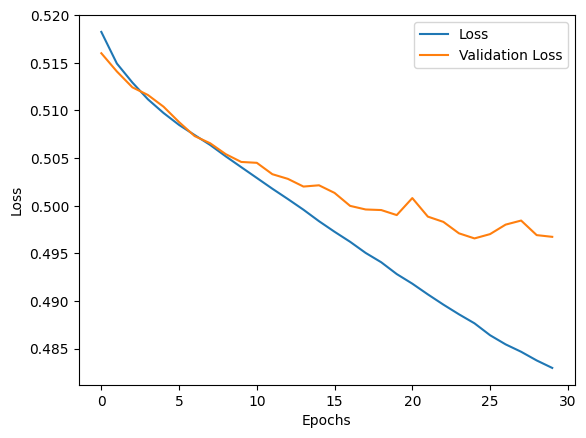

In [102]:
import matplotlib.pyplot as plt

# Plot the loss and validation loss
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [89]:
def create_model(learning_rate):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

results = {}

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model = create_model(lr)

    # F1 Score Callback
    f1_callback = F1ScoreCallback(X_test, y_test)
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[f1_callback,early_stopping])
    
    # Evaluation
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Learning Rate: {lr} - Accuracy: {scores[1]}")
    
    results[lr] = scores[1]

# Displaying the results
for lr, accuracy in results.items():
    print(f"Learning Rate: {lr} - Accuracy: {accuracy}")


Training model with learning rate: 0.0001
Epoch 1/10
3431/3431 [==============================] - 10s 3ms/step
Epoch 1 - Weighted F1 Score: 0.880742270143509
13722/13722 [==============================] - 130s 9ms/step - loss: 0.5200 - accuracy: 0.7870 - val_loss: 0.5181 - val_accuracy: 0.7869
Epoch 2/10
3431/3431 [==============================] - 10s 3ms/step
Epoch 2 - Weighted F1 Score: 0.880742270143509
13722/13722 [==============================] - 122s 9ms/step - loss: 0.5179 - accuracy: 0.7870 - val_loss: 0.5180 - val_accuracy: 0.7869
Epoch 3/10
3431/3431 [==============================] - 10s 3ms/step
Epoch 3 - Weighted F1 Score: 0.880742270143509
13722/13722 [==============================] - 126s 9ms/step - loss: 0.5178 - accuracy: 0.7870 - val_loss: 0.5179 - val_accuracy: 0.7869
Epoch 4/10
3431/3431 [==============================] - 10s 3ms/step
Epoch 4 - Weighted F1 Score: 0.880742270143509
13722/13722 [==============================] - 133s 10ms/step - loss: 0.5177 - accu

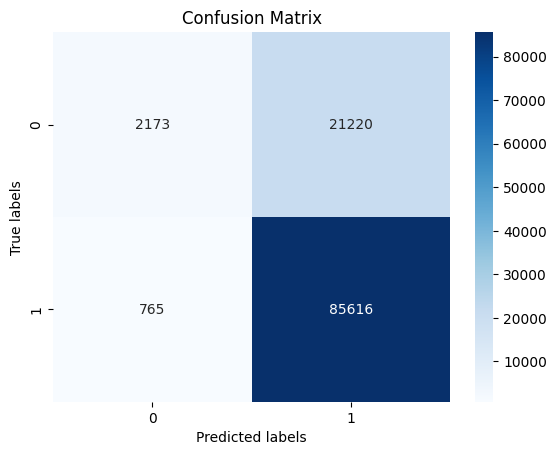

In [105]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains your actual labels
true_classes = y_test
conf_matrix = confusion_matrix(true_classes, predicted_classes)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [1]:
#CROSS VALIDATION

# WITH FOUR FEATURES-TOTAL DEFORMATION , SHEAR STRESS XY , SHEAR STRESS XZ AND SHEAR STRESS YZ

selected_columns = ['Total Deformation (mm) for Total Deformation 0.1','Shear Stress (MPa) for Shear Stress XY 0.1','Shear Stress (MPa) for Shear Stress XZ 0.1','Shear Stress (MPa) for Shear Stress YZ 0.1',
                    'Total Deformation (mm) for Total Deformation 1.1','Shear Stress (MPa) for Shear Stress XY 1.1','Shear Stress (MPa) for Shear Stress XZ 1.1','Shear Stress (MPa) for Shear Stress YZ 1.1',
                    'Total Deformation (mm) for Total Deformation 2.1','Shear Stress (MPa) for Shear Stress XY 2.1','Shear Stress (MPa) for Shear Stress XZ 2.1','Shear Stress (MPa) for Shear Stress YZ 2.1',
                    'Total Deformation (mm) for Total Deformation 3.0','Shear Stress (MPa) for Shear Stress XY 3','Shear Stress (MPa) for Shear Stress XZ 3','Shear Stress (MPa) for Shear Stress YZ 3']

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_new is your DataFrame
X1 = df1[selected_columns]

# Number of features per time step
num_features_per_time_step = 4  # Adjust based on your dataset

# Reshape the data for LSTM [samples, time_steps, features]
time_steps = int(X1.shape[1] / num_features_per_time_step)
X1_reshaped = X1.values.reshape(X1.shape[0], time_steps, num_features_per_time_step)

# Normalize the features
scaler = StandardScaler()
X1_scaled = np.array([scaler.fit_transform(x) for x in X1_reshaped])

# Assuming you have a way to assign labels to each node
y1 = df1['Label']



#print(y_test.head(10))

from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


class F1ScoreCallback(Callback):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X) > 0.5).astype("int32")  # Thresholding at 0.5 for binary classification
        f1 = f1_score(self.y, y_pred)
        print(f'Epoch {epoch+1} - Weighted F1 Score: {f1}')

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))                                                    
custom_optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# F1 Score Callback
f1_callback = F1ScoreCallback(X_test, y_test)
# Perform cross-validation with F1 score callback
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X1_reshaped, y):
    X1_train, X1_test = X1_reshaped[train_index], X1_reshaped[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    f1_callback = F1ScoreCallback(X_test, y_test)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[f1_callback,early_stopping])



NameError: name 'df1' is not defined

In [93]:

#TEST SET

df_tset_sxy= pd.read_csv('/kaggle/input/praveen/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Shear Stress XY.csv')
df_tset_sxz= pd.read_csv('/kaggle/input/praveen/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Shear Stress XZ.csv')
df_tset_syz= pd.read_csv('/kaggle/input/praveen/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Shear Stress YZ.csv')
df_tset_tdef= pd.read_csv('/kaggle/input/praveen/CIE-exercise-reduced/sim_data/Test_set/Imperfect_no_4_1_train_middle_track_2000N/Total Deformation.csv')

df_tset = [df_tset_sxy,df_tset_sxz,df_tset_syz,df_tset_tdef]
# #print(df_tset_def_x)
for df in df_tset:
     df.drop([df.columns[12]],axis=1,inplace=True)
#print(df_tset_tdef.head(2))
df_tset_merged = pd.merge(df_tset_sxy, df_tset_sxz, on='Node Number')
df_tset_merged = pd.merge(df_tset_merged,df_tset_syz, on='Node Number')
df_tset_merged = pd.merge(df_tset_merged, df_tset_tdef, on='Node Number')

df_tset_merged
selected_columns_tset = ['Total Deformation (mm) for Total Deformation 0.1','Shear Stress (MPa) for Shear Stress XY 0.1','Shear Stress (MPa) for Shear Stress XZ 0.1','Shear Stress (MPa) for Shear Stress YZ 0.1',
                    'Total Deformation (mm) for Total Deformation 1.1','Shear Stress (MPa) for Shear Stress XY 1.1','Shear Stress (MPa) for Shear Stress XZ 1.1','Shear Stress (MPa) for Shear Stress YZ 1.1',
                    'Total Deformation (mm) for Total Deformation 2.1','Shear Stress (MPa) for Shear Stress XY 2.1','Shear Stress (MPa) for Shear Stress XZ 2.1','Shear Stress (MPa) for Shear Stress YZ 2.1',
                    'Total Deformation (mm) for Total Deformation 3.0','Shear Stress (MPa) for Shear Stress XY 3','Shear Stress (MPa) for Shear Stress XZ 3','Shear Stress (MPa) for Shear Stress YZ 3']

df_selected_test = df_tset_merged[selected_columns_tset]
df_selected_test.head(2)
df_selected_test.shape

# Assuming df_new is your DataFrame
X3 = df_selected_test

# Number of features per time step
num_features_per_time_step = 4  # Adjust based on your dataset

# Reshape the data for LSTM [samples, time_steps, features]
time_steps = int(X3.shape[1] / num_features_per_time_step)
X3_reshaped = X3.values.reshape(X3.shape[0], time_steps, num_features_per_time_step)

# Normalize the features
scaler = StandardScaler()
X3_scaled = np.array([scaler.fit_transform(x) for x in X3_reshaped])



In [97]:
rows ,cols , z = X3_scaled.shape
rows
y3 = pd.DataFrame(1,index=range(rows), columns=['Label'])
y3.head(2)

,Label
0,1
1,1


In [106]:

# Load model
loaded_model = load_model('my_lstm_model_1')

predicted_probabilities_t = loaded_model.predict(X3_scaled)

predicted_classes_t = (predicted_probabilities_t > 0.5).astype(int)


#for actual_prob,pred in zip(y_test,predicted_classes):
    #print(f"{actual_prob} , {pred}")
    


906/906 [==============================] - 3s 3ms/step


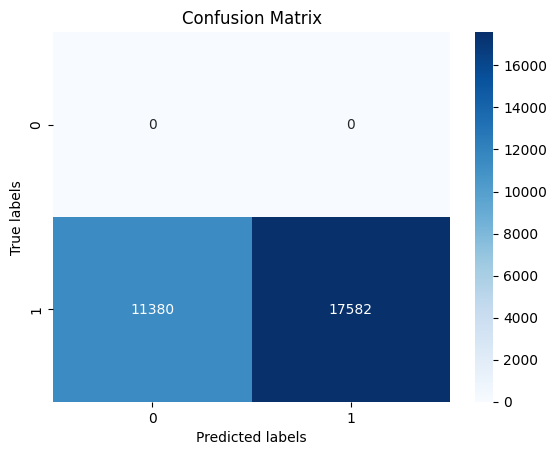

In [107]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains your actual labels
true_classes = y3
conf_matrix = confusion_matrix(true_classes, predicted_classes_t)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# U-NET


In [ ]:
import numpy as np 
from PIL import Image
import pandas as pd 
import os

PATH = "/mnt/d/CiE - Data/"
i = 0
save = True # variable determine if the transformed data shall be saved

for dir in os.listdir(PATH):
    
    FILE_PATH = PATH+dir
    df_con = pd.DataFrame()
    i = i+1
    
    # Concatenate all csv in order of timesteps [x0.1,y0.1,z0.1,x0.5,y0.5,...] 
    for t in range(1, 11):
        df_timestep = pd.DataFrame() #create empty dataframe for feature values on a certain timestep

        for file in os.listdir(FILE_PATH):
            df = pd.read_csv(FILE_PATH+"/"+file)
            df_index = df["Node Number"].iloc[-1] #get last node number            
            missing_nodes = [] # list of all node numbers that are missing
            
            # create list of missing nodes if structure is imperfect
            for j in range(1, df_index):
                np_node_number = df["Node Number"].to_numpy()
                if j not in np_node_number:
                    missing_nodes.append(j)            

            # drop and concatinate dataframe
            df = df.drop("Node Number", axis=1)
            df = df.drop("Unnamed: 12", axis=1)
            df_timestep = pd.concat([df_timestep, df.iloc[:,t]], axis=1) 
            df_con = pd.concat([df_con, df.iloc[:,t]], axis=1)

    '''
    # Alternative data concatination [x0.1, x0.5, ..., y0.1, y0.2, ...]
    for file in os.listdir(PATH):
        df = pd.read_csv(PATH+file)
        df = df.drop("Node Number", axis=1)
        df = df.drop("Unnamed: 12", axis=1)
        df_con = pd.concat([df_con, df], axis=1)
    '''

    # DataFrame to numpy array
    data_f = df_con.to_numpy()
    print(data_f.shape)
    print(np.nanmax(data_f), np.nanmin(data_f))

    #normalize data 
    #TODO Normalize each Feature eg. column by its min max value
    data = (data_f+abs(np.nanmin(data_f)))/np.nanmax(data_f+abs(np.nanmin(data_f)))*255
    data = np.asarray(data, dtype=np.uint8)
    print(np.nanmax(data), np.nanmin(data))

    # convert and save training data as image
    im = Image.fromarray(data, mode="L")
    im = im.convert(mode="RGB")
    im_height = (int(im.size[1]/2))
    im = im.resize((512,im_height))
    if save == True:
        im.save(PATH+f"/{i}.jpg")

    # generate labeled data
    label_data = np.zeros_like(data, dtype=np.uint8)
    for index in missing_nodes:
        label_data[index,:] = 255 # make rows of missing nodes 
        
    # create image with two channels 
    label_im_c2 = Image.fromarray(label_data, mode="L")
    label_im_c1 = Image.fromarray(np.ones_like(data, dtype=np.uint8)*255)
    label_im = Image.merge("LA", (label_im_c1, label_im_c2))
    
    # resize image so its wide enough for unet
    label_im = label_im.resize((512,im_height))
    
    # debug output
    #print("Max and Min of channel 0 of labeled Image:", np.asarray(label_im.getchannel(0)).max(), np.asarray(label_im.getchannel(0)).min())
    #print("Max and Min of channel 1 of labeled Image:", np.asarray(label_im.getchannel(1)).max(), np.asarray(label_im.getchannel(1)).min())    
    # print("Shape of Image:", np.asarray(label_im).shape)
    
    # save labeled data
    if save == True:
        label_im.save(PATH+f"/{i}_mask.gif") 



# BINARY MULTI CLASS CLASSIFIER

In [ ]:
PATH_DATA = '/kaggle/input/praveen/CIE-exercise-reduced/sim_data'
P_PATH_STRUCTURE = '/per_data/'
IMP_PATH_STRUCTURE = '/imp_data/'
PATH_LOAD_CASE_P = os.listdir(PATH_DATA+P_PATH_STRUCTURE)
PATH_LOAD_CASE_IP = os.listdir(PATH_DATA+IMP_PATH_STRUCTURE)
#reading perfect data for all four cases
#df_<..>_{1,2,3,4}.1-extreme track 2000 2-extreme track 5000 3-opposite direction 2000 4-middle track 2000 [loading cases]

df_perfred_1_tf = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Total Deformation.csv')
df_perfred_1_sxy = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Shear Stress XY.csv')
df_perfred_1_sxz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Shear Stress XZ.csv')
df_perfred_1_syz = pd.read_csv(PATH_DATA+P_PATH_STRUCTURE +PATH_LOAD_CASE_P[1]+'/Shear Stress YZ.csv')


df_perfred_1_tf.drop([df_perfred_1_tf.columns[12]],axis=1,inplace=True)
df_perfred_1_sxy.drop([df_perfred_1_sxy.columns[12]],axis=1,inplace=True)
df_perfred_1_sxz.drop([df_perfred_1_sxz.columns[12]],axis=1,inplace=True)
df_perfred_1_syz.drop([df_perfred_1_syz.columns[12]],axis=1,inplace=True)

df_perfred_1 = pd.merge(df_perfred_1_tf,df_perfred_1_sxy, on='Node Number')
df_perfred_1 = pd.merge(df_perfred_1,df_perfred_1_sxz, on='Node Number')
df_perfred_1 = pd.merge(df_perfred_1,df_perfred_1_syz, on='Node Number')


df_perfred_1['Label'] = 0

In [ ]:
#class 1 defect file
#df_imperfred_c1_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/reduced_dataset.csv'



df_imperfred_c1_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Total Deformation.csv')
df_imperfred_c1_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Shear Stress XY.csv')
df_imperfred_c1_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Shear Stress XZ.csv')
df_imperfred_c1_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[0]+'/Shear Stress YZ.csv')

df_imperfred_c1_1_tf.drop([df_imperfred_c1_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c1_1_sxy.drop([df_imperfred_c1_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c1_1_sxz.drop([df_imperfred_c1_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c1_1_syz.drop([df_imperfred_c1_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c1_1 = pd.merge(df_imperfred_c1_1_tf,df_imperfred_c1_1_sxy, on='Node Number')
df_imperfred_c1_1 = pd.merge(df_imperfred_c1_1,df_imperfred_c1_1_sxz, on='Node Number')
df_imperfred_c1_1 = pd.merge(df_imperfred_c1_1,df_imperfred_c1_1_syz, on='Node Number')


df_imperfred_c1_1['Label'] = 1


#print(PATH_LOAD_CASE_IP[0])

In [ ]:
#class 2 defect file
#df_imperfred_c2_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/reduced_dataset.csv')



df_imperfred_c2_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Total Deformation.csv')
df_imperfred_c2_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Shear Stress XY.csv')
df_imperfred_c2_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Shear Stress XZ.csv')
df_imperfred_c2_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[3]+'/Shear Stress YZ.csv')

df_imperfred_c2_1_tf.drop([df_imperfred_c2_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c2_1_sxy.drop([df_imperfred_c2_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c2_1_sxz.drop([df_imperfred_c2_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c2_1_syz.drop([df_imperfred_c2_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c2_1 = pd.merge(df_imperfred_c2_1_tf,df_imperfred_c2_1_sxy, on='Node Number')
df_imperfred_c2_1 = pd.merge(df_imperfred_c2_1,df_imperfred_c2_1_sxz, on='Node Number')
df_imperfred_c2_1 = pd.merge(df_imperfred_c2_1,df_imperfred_c2_1_syz, on='Node Number')


df_imperfred_c2_1['Label'] = 2

In [ ]:
#class 3 defect file
#df_imperfred_c3_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/reduced_dataset.csv')



df_imperfred_c3_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Total Deformation.csv')
df_imperfred_c3_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Shear Stress XY.csv')
df_imperfred_c3_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Shear Stress XZ.csv')
df_imperfred_c3_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[6]+'/Shear Stress YZ.csv')

df_imperfred_c3_1_tf.drop([df_imperfred_c3_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c3_1_sxy.drop([df_imperfred_c3_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c3_1_sxz.drop([df_imperfred_c3_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c3_1_syz.drop([df_imperfred_c3_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c3_1 = pd.merge(df_imperfred_c3_1_tf,df_imperfred_c3_1_sxy, on='Node Number')
df_imperfred_c3_1 = pd.merge(df_imperfred_c3_1,df_imperfred_c3_1_sxz, on='Node Number')
df_imperfred_c3_1 = pd.merge(df_imperfred_c3_1,df_imperfred_c3_1_syz, on='Node Number')


df_imperfred_c3_1['Label'] = 3

In [ ]:
#class 4 defect file
#df_imperfred_c4_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/reduced_dataset.csv')


df_imperfred_c4_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Total Deformation.csv')
df_imperfred_c4_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Shear Stress XY.csv')
df_imperfred_c4_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Shear Stress XZ.csv')
df_imperfred_c4_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[9]+'/Shear Stress YZ.csv')

df_imperfred_c4_1_tf.drop([df_imperfred_c4_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c4_1_sxy.drop([df_imperfred_c4_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c4_1_sxz.drop([df_imperfred_c4_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c4_1_syz.drop([df_imperfred_c4_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c4_1 = pd.merge(df_imperfred_c4_1_tf,df_imperfred_c4_1_sxy, on='Node Number')
df_imperfred_c4_1 = pd.merge(df_imperfred_c4_1,df_imperfred_c4_1_sxz, on='Node Number')
df_imperfred_c4_1 = pd.merge(df_imperfred_c4_1,df_imperfred_c4_1_syz, on='Node Number')


df_imperfred_c4_1['Label'] = 4

In [ ]:
#class 5 defect file
#df_imperfred_c5_1 = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/reduced_dataset.csv')


df_imperfred_c5_1_tf = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Total Deformation.csv')
df_imperfred_c5_1_sxy = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Shear Stress XY.csv')
df_imperfred_c5_1_sxz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Shear Stress XZ.csv')
df_imperfred_c5_1_syz = pd.read_csv(PATH_DATA+IMP_PATH_STRUCTURE +PATH_LOAD_CASE_IP[12]+'/Shear Stress YZ.csv')

df_imperfred_c5_1_tf.drop([df_imperfred_c5_1_tf.columns[12]],axis=1,inplace=True)
df_imperfred_c5_1_sxy.drop([df_imperfred_c5_1_sxy.columns[12]],axis=1,inplace=True)
df_imperfred_c5_1_sxz.drop([df_imperfred_c5_1_sxz.columns[12]],axis=1,inplace=True)
df_imperfred_c5_1_syz.drop([df_imperfred_c5_1_syz.columns[12]],axis=1,inplace=True)

df_imperfred_c5_1 = pd.merge(df_imperfred_c5_1_tf,df_imperfred_c5_1_sxy, on='Node Number')
df_imperfred_c5_1 = pd.merge(df_imperfred_c5_1,df_imperfred_c5_1_sxz, on='Node Number')
df_imperfred_c5_1 = pd.merge(df_imperfred_c5_1,df_imperfred_c5_1_syz, on='Node Number')


df_imperfred_c5_1['Label'] = 5

In [ ]:
#Loadcase 1
df1 = pd.concat([df_perfred_1,df_imperfred_c1_1,df_imperfred_c2_1,df_imperfred_c3_1,df_imperfred_c4_1,df_imperfred_c5_1])

In [ ]:
# WITH FOUR FEATURES-TOTAL DEFORMATION , SHEAR STRESS XY , SHEAR STRESS XZ AND SHEAR STRESS YZ

selected_columns = ['Total Deformation (mm) for Total Deformation 0.1','Shear Stress (MPa) for Shear Stress XY 0.1','Shear Stress (MPa) for Shear Stress XZ 0.1','Shear Stress (MPa) for Shear Stress YZ 0.1',
                    'Total Deformation (mm) for Total Deformation 1.1','Shear Stress (MPa) for Shear Stress XY 1.1','Shear Stress (MPa) for Shear Stress XZ 1.1','Shear Stress (MPa) for Shear Stress YZ 1.1',
                    'Total Deformation (mm) for Total Deformation 2.1','Shear Stress (MPa) for Shear Stress XY 2.1','Shear Stress (MPa) for Shear Stress XZ 2.1','Shear Stress (MPa) for Shear Stress YZ 2.1',
                    'Total Deformation (mm) for Total Deformation 3.0','Shear Stress (MPa) for Shear Stress XY 3','Shear Stress (MPa) for Shear Stress XZ 3','Shear Stress (MPa) for Shear Stress YZ 3']

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.optimizers import Adam

# Assuming df_new is your DataFrame
X = df1[selected_columns]

# Number of features per time step
num_features_per_time_step = 4  # Adjust based on your dataset

# Reshape the data for LSTM [samples, time_steps, features]
time_steps = int(X.shape[1] / num_features_per_time_step)
X_reshaped = X.values.reshape(X.shape[0], time_steps, num_features_per_time_step)

# Normalize the features
scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X_reshaped])

# Assuming you have a way to assign labels to each node
y = df1['Label']

# Convert labels to categorical for classification
y_categorical = to_categorical(y)

from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback

class F1ScoreCallback(Callback):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(self.y, axis=1)
        f1 = f1_score(y_true, y_pred_classes, average='weighted')
        print(f'Weighted F1 Score: {f1}')

# ...

# Initialize the RNN
model = Sequential()

# Adding the LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_categorical.shape[1], activation='softmax'))

# Compiling the RNN
custom_optimizer = Adam(learning_rate=0.0009)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Perform cross-validation with F1 score callback
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_reshaped, y):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    f1_callback = F1ScoreCallback(X_test, y_test)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[f1_callback])